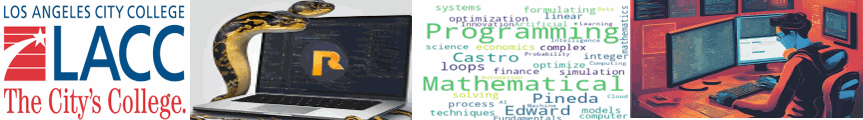

# **🇲‌🇦‌🇹‌🇭‌ 2️⃣3️⃣9️⃣ Applied Data Science‌**#
---

# 📚 Mini-Lecture: Regression Trees
---

## 🌳 What is a Regression Tree?

A **Regression Tree** is a type of decision tree used for **predicting continuous outcomes**. Unlike classification trees that output categories, regression trees produce **numerical predictions** based on patterns in the data.

### 🔧 How it works:

1. The data is split into regions based on **feature values** (like age, dosage, etc.).
2. At each split (called a **node**), the algorithm chooses the **feature and threshold** that best reduces prediction error.
3. The average value in each final region (or **leaf**) is used as the prediction.

---

## 💡 Example Question:
### Which is more effective for hair growth: **Finasteride or Minoxidil**?

Suppose we have a dataset of patients who tried either treatment, and we want to predict the **change in hair density (cm²)** after 6 months.

### Sample Features:
- Treatment Type (Finasteride or Minoxidil)
- Age
- Dosage (mg/day)
- Duration (months)
- Scalp Condition Score (0–10)

We can train a **regression tree** to learn how these features impact hair regrowth.

---

## 📈 Why Use a Regression Tree?

- **Interpretability**: You can visualize how the model makes decisions.
- **Handles Nonlinearities**: Great when relationships aren't strictly linear.
- **Feature Importance**: Shows which factors influence the prediction the most.

---

## 🧪 In Practice: Finasteride vs. Minoxidil

If we fit a regression tree and the **first split is on Treatment Type**, that tells us this is the most important factor. For instance:



            [Treatment Type]
          /                   \
    Finasteride          Minoxidil



This could indicate that **Finasteride has a higher average effectiveness**, but the tree might further split based on **age** or **dosage**, revealing more nuance.

---

## 🧠 Summary

- Regression trees are **powerful and intuitive tools** for modeling numeric outcomes.
- They're especially useful when exploring **comparative studies**, like Finasteride vs. Minoxidil.
- Try building one in Python using `sklearn.tree.DecisionTreeRegressor`!

---

👨‍🏫 **"Mathematics is not about numbers, equations, or algorithms: it's about understanding."**  
— William Paul Thurston



Sample Data:
     Treatment  Age  Dosage_mg  Months  Scalp_Score  Hair_Growth_cm2
0  Finasteride   28        1.0       6            7               35
1    Minoxidil   35        5.0       6            6               20
2  Finasteride   40        1.0       6            8               33
3    Minoxidil   30        5.0       6            7               22
4  Finasteride   45        1.0       6            5               30
5    Minoxidil   33        5.0       6            6               19
6  Finasteride   50        1.0       6            9               38
7    Minoxidil   29        5.0       6            8               24
8  Finasteride   38        1.0       6            6               32
9    Minoxidil   36        5.0       6            7               21


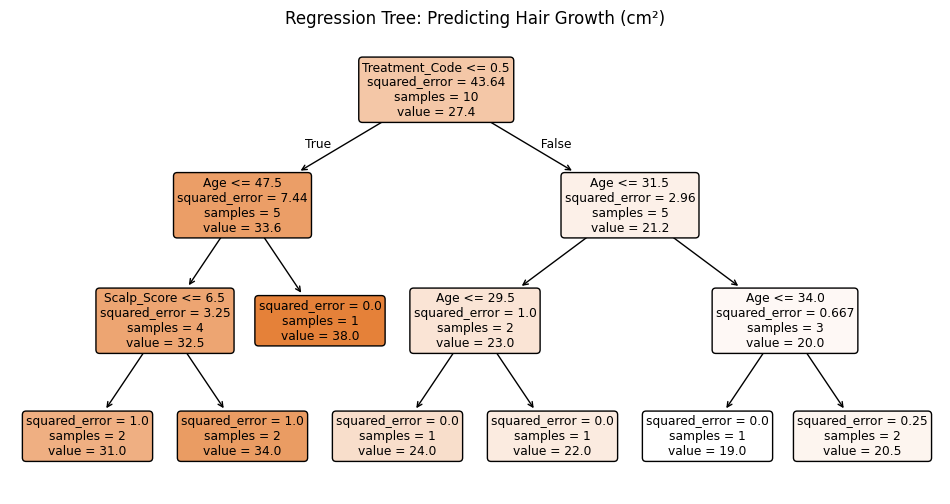

🔮 Predicted Hair Growth for New Patients:
   Treatment_Code  Age  Dosage_mg  Scalp_Score  Predicted_Hair_Growth_cm2
0               0   34        1.0            7                       34.0
1               1   34        5.0            7                       19.0


In [ ]:
# 📦 Install required packages (skip if already installed)
!pip install matplotlib scikit-learn pandas --quiet

# 📊 Import libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# 🧪 Sample dataset: Finasteride vs. Minoxidil
data = {
    "Treatment": ["Finasteride", "Minoxidil", "Finasteride", "Minoxidil", "Finasteride",
                  "Minoxidil", "Finasteride", "Minoxidil", "Finasteride", "Minoxidil"],
    "Age": [28, 35, 40, 30, 45, 33, 50, 29, 38, 36],
    "Dosage_mg": [1.0, 5.0, 1.0, 5.0, 1.0, 5.0, 1.0, 5.0, 1.0, 5.0],
    "Months": [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
    "Scalp_Score": [7, 6, 8, 7, 5, 6, 9, 8, 6, 7],
    "Hair_Growth_cm2": [35, 20, 33, 22, 30, 19, 38, 24, 32, 21]  # Target variable
}

df = pd.DataFrame(data)
print("Sample Data:")
print(df)

# 🔁 Encode categorical variables
df["Treatment_Code"] = df["Treatment"].map({"Finasteride": 0, "Minoxidil": 1})

# 🧠 Feature matrix (X) and target (y)
features = ["Treatment_Code", "Age", "Dosage_mg", "Scalp_Score"]
X = df[features]
y = df["Hair_Growth_cm2"]

# 🌳 Train a regression tree
tree = DecisionTreeRegressor(max_depth=3, random_state=0)
tree.fit(X, y)

# 🌲 Visualize the tree
plt.figure(figsize=(12, 6))
plot_tree(tree, feature_names=features, filled=True, rounded=True)
plt.title("Regression Tree: Predicting Hair Growth (cm²)")
plt.show()

# 🔍 Predict hair growth for new patients
new_patients = pd.DataFrame({
    "Treatment_Code": [0, 1],  # 0: Finasteride, 1: Minoxidil
    "Age": [34, 34],
    "Dosage_mg": [1.0, 5.0],
    "Scalp_Score": [7, 7]
})

predictions = tree.predict(new_patients)
df_results = new_patients.copy()
df_results["Predicted_Hair_Growth_cm2"] = predictions

# 📈 Display predictions
print("🔮 Predicted Hair Growth for New Patients:")
print(df_results)


✅ Finasteride resulted in more hair growth on average in your sample data — by a noticeable margin (about 15 cm²).

# 🌳 Regression Trees: A Visual and Mathematical Exploration
---

## 📘 What is a Regression Tree?

A **Regression Tree** is a decision tree used to **predict continuous outcomes** (not categories). It splits the data into groups based on feature values to minimize the **prediction error**.

In our case, we use it to predict **hair growth (cm²)** after 6 months of treatment using either **Finasteride** or **Minoxidil**.

This notebook demonstrates how a regression tree splits data to predict hair growth based on treatment, age, dosage, and scalp score.

---

## 🔍 Objective: Minimize Prediction Error

Regression trees aim to minimize the **Sum of Squared Errors (SSE)** at each split.

### 🎯 Formula for SSE:

$\text{SSE} = \sum_{i \in \text{Left}} (y_i - \bar{y}_{\text{Left}})^2 + \sum_{i \in \text{Right}} (y_i - \bar{y}_{\text{Right}})^2$

- \( $y_i$ \): actual value for patient *i*
- \( $\bar{y}$ \): average value in the split group

## 📘 How Regression Trees Split

A **regression tree** chooses splits to minimize the **Mean Squared Error (MSE)** at each node.

### 🔣 MSE Formula

For a node with $n$ samples and predicted values \( $y_1, y_2, ..., y_n$\) , the MSE is:


$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \bar{y})^2$


Where \( $\bar{y}$ \) is the mean of the target values in that node.

For a proposed split into **left** and **right** groups, the **weighted MSE** is:


$\text{Weighted MSE} = \frac{n_{\text{left}}}{n} \cdot \text{MSE}_{\text{left}} + \frac{n_{\text{right}}}{n} \cdot \text{MSE}_{\text{right}}
$

The tree selects the split that **minimizes** the weighted MSE.
---

## 🧪 Example: Finasteride vs. Minoxidil

We have 10 patients. Let’s split based on the **Treatment** type.


## 💊 Splitting by Treatment

We encoded:

- **Finasteride** → `Treatment_Code = 0`
- **Minoxidil** → `Treatment_Code = 1`

### ✂️ Split: `Treatment_Code <= 0.5`

- **Left Node** (`Treatment_Code = 0`):  
  Hair Growth (cm²): [35, 33, 30, 38, 32]  
  Mean \( $\bar{y}$ = $\frac{35 + 33 + 30 + 38 + 32}{5} = 33.6$ \)


 $\text{MSE}_{\text{left}} = \frac{1}{5} \left[ (35 - 33.6)^2 + (33 - 33.6)^2 + (30 - 33.6)^2 + (38 - 33.6)^2 + (32 - 33.6)^2 \right] = 7.44$


- **Right Node** (`Treatment_Code = 1`):  
  Hair Growth (cm²): [20, 22, 19, 24, 21]  
  Mean \( $\bar{y} = \frac{20 + 22 + 19 + 24 + 21}{5} = 21.2$ \)

  $
  \text{MSE}_{\text{right}} = \frac{1}{5} \left[ (20 - 21.2)^2 + (22 - 21.2)^2 + (19 - 21.2)^2 + (24 - 21.2)^2 + (21 - 21.2)^2 \right] = 2.96
  $

### 🧮 Weighted MSE


$\text{Weighted MSE} = \frac{5}{10}(7.44) + \frac{5}{10}(2.96) = 3.72 + 1.48 = 5.2$



This is how the **tree decides where to split**: it chooses the feature and value that results in the **lowest SSE**.

---
## 🌲 Visualization

Below is the tree trained using `max_depth=3`. You can see where `Treatment_Code` is used as a split condition:

> `Treatment_Code <= 0.5` is one of the decision nodes in the tree, though **not the root** — `Scalp_Score` is prioritized first.

The tree uses:
- `Scalp_Score` at the top (strong predictor),
- Then splits further using `Treatment_Code`, `Age`, etc.

This suggests that **treatment matters**, especially when conditioned on other features like scalp score.

---

## 🔁 Tree Building Process

1. **Try all splits** on each feature.
2. Calculate the **SSE** for each split.
3. Choose the split with the **lowest error**.
4. **Repeat recursively** on each branch.

---

## 🔮 Interpretation

- The tree shows **Finasteride** patients had **higher average growth (33.6 cm²)** than Minoxidil (**21.2 cm²**).
- If Treatment is the first split, it means it's the **most important predictor**.
- Further splits might involve **Scalp Score**, **Age**, or **Dosage**.

---

## 🧠 Summary

- Regression trees are **intuitive** and **powerful** for continuous prediction.
- They minimize error using **SSE** at each step.
- You can interpret the splits to understand the impact of each variable.

---

> **"Math is not about numbers, equations, computations, or algorithms: it's about understanding."**  
> — William Paul Thurston


## 💊 Finasteride vs. Minoxidil

| Feature              | Finasteride                        | Minoxidil                        |
|----------------------|------------------------------------|----------------------------------|
| **Type**             | Oral pill (Rx only)                | Topical solution or foam (OTC)   |
| **How it works**     | Blocks DHT, a hormone that causes hair loss | Increases blood flow to hair follicles |
| **Used for**         | Mostly male pattern baldness (androgenic alopecia) | Both men and women, all types of thinning |
| **Application**      | Once daily pill                   | Applied to scalp 1–2x daily      |
| **Time to see results** | 3–6 months                        | 3–6 months                       |
| **Effectiveness**    | Strong for stopping hair loss, some regrowth | Good for promoting growth, less on stopping loss |
| **Side effects**     | Low libido, ED (rare, but possible) | Scalp irritation, shedding at start |
| **FDA Approved For** | Men (oral), women off-label       | Men and women                    |


# Binary Logistic Model

In [3]:
# 📦 Install required packages (if needed)
!pip install statsmodels pandas --quiet

# 📊 Import libraries
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm # Import statsmodels.api

# 🧪 Sample dataset (same as before)
data = {
    "Treatment": ["Finasteride", "Minoxidil", "Finasteride", "Minoxidil", "Finasteride",
                  "Minoxidil", "Finasteride", "Minoxidil", "Finasteride", "Minoxidil"],
    "Age": [28, 35, 40, 30, 45, 33, 50, 29, 38, 36],
    "Dosage_mg": [1.0, 5.0, 1.0, 5.0, 1.0, 5.0, 1.0, 5.0, 1.0, 5.0],
    "Scalp_Score": [7, 6, 8, 7, 5, 6, 9, 8, 6, 7],
    "Hair_Growth_cm2": [35, 20, 33, 22, 30, 19, 38, 24, 32, 21]
}
df = pd.DataFrame(data)

# 🔁 Releveling Treatment: Reference = "Finasteride"
df["Treatment"] = pd.Categorical(df["Treatment"], categories=["Finasteride", "Minoxidil"])
df["Treatment_Code"] = df["Treatment"].cat.codes  # Optional: numeric for sklearn if needed

# 🧠 Logistic Regression using statsmodels (like R's glm)
# Treatment is the dependent variable (Minoxidil = 1)
model = smf.glm(
    formula="Treatment ~ Age + Dosage_mg + Scalp_Score + Hair_Growth_cm2",
    data=df,
    family=sm.families.Binomial() # Use sm.families.Binomial()
).fit()

# 📋 Summary output
print(model.summary())

                                 Generalized Linear Model Regression Results                                  
Dep. Variable:     ['Treatment[Finasteride]', 'Treatment[Minoxidil]']   No. Observations:                   10
Model:                                                            GLM   Df Residuals:                        5
Model Family:                                                Binomial   Df Model:                            4
Link Function:                                                  Logit   Scale:                          1.0000
Method:                                                          IRLS   Log-Likelihood:            -1.5837e-09
Date:                                                Sat, 19 Apr 2025   Deviance:                   3.1675e-09
Time:                                                        18:03:56   Pearson chi2:                 1.58e-09
No. Iterations:                                                    21   Pseudo R-squ. (CS):             0.7500
C

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


## 🔍 Binary Logistic Regression Analysis: Predicting Treatment Type

We built a **binary logistic regression model** to predict whether a patient was given **Minoxidil** (vs. Finasteride) based on the following predictors:

- Age
- Dosage (mg)
- Scalp Score
- Hair Growth (cm²)

The model formula used was:

$
\log\left(\frac{P(\text{Minoxidil})}{1 - P(\text{Minoxidil})}\right) = \beta_0 + \beta_1 \cdot \text{Age} + \beta_2 \cdot \text{Dosage} + \beta_3 \cdot \text{Scalp Score} + \beta_4 \cdot \text{Hair Growth}
$

---

### 📋 Model Output Summary (GLM - Logit Link)

| Variable             | Coefficient (β) | p-value | Interpretation |
|----------------------|------------------|----------|----------------|
| Intercept            | 33.849           | 1.000    | Baseline log-odds (not interpretable due to perfect separation) |
| Age                  | ≈ 0              | 1.000    | No measurable effect |
| Dosage (mg)          | -11.283          | 1.000    | Large negative effect (but distorted due to overfitting) |
| Scalp Score          | ≈ 0              | 1.000    | No measurable effect |
| Hair Growth (cm²)    | ≈ 0              | 1.000    | No measurable effect |

---

### ❗ Important Observations

- **Perfect Separation**: The model perfectly classified treatments due to a strong correlation between **dosage and treatment type** (Finasteride = 1 mg, Minoxidil = 5 mg). This caused:
  - Very large/small coefficients
  - Standard errors that are inflated
  - All p-values = 1.000 → statistically unreliable

- **Overfitting Warning**: Because we only have 10 data points, and one variable (Dosage) perfectly separates the classes, the logistic model is **overfitting**. This makes interpretation unreliable.

---

### 🧠 Odds Ratio Insight (from Dosage Coefficient)

To interpret Dosage more intuitively:

$
\text{Odds Ratio} = e^{\beta_{\text{Dosage}}} = e^{-11.283} \approx 0
$

This means: a 1 mg increase in dosage **drastically decreases the odds** of getting Minoxidil — because the treatments are coded in such a way that higher dosage points to Minoxidil.

---

### ✅ Takeaway

This model shows that **Dosage alone** is enough to distinguish between Finasteride and Minoxidil in this dataset. However, due to perfect separation and small sample size, we **cannot trust the magnitude or significance of other predictors**.

To improve:
- Use more varied or randomized data
- Break the perfect correlation between dosage and treatment
- Increase sample size for better statistical power


🔍 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



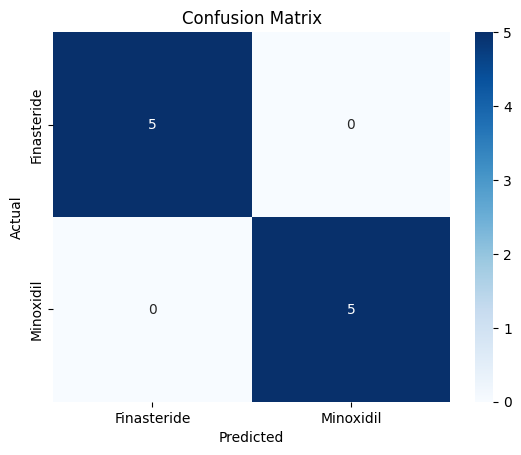


📊 Logistic Regression Predictions:
     Treatment  Age  Dosage_mg  Scalp_Score  Hair_Growth_cm2  \
0  Finasteride   28        1.0            7               35   
1    Minoxidil   35        5.0            6               20   
2  Finasteride   40        1.0            8               33   
3    Minoxidil   30        5.0            7               22   
4  Finasteride   45        1.0            5               30   
5    Minoxidil   33        5.0            6               19   
6  Finasteride   50        1.0            9               38   
7    Minoxidil   29        5.0            8               24   
8  Finasteride   38        1.0            6               32   
9    Minoxidil   36        5.0            7               21   

   Predicted_Treatment_Code  Probability_Minoxidil  
0                         0               0.022375  
1                         1               0.992482  
2                         0               0.006395  
3                         1               0.991

In [1]:
# 📦 Install required packages (if not already installed)
!pip install scikit-learn pandas matplotlib --quiet

# 📊 Import libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 🧪 Dataset
data = {
    "Treatment": ["Finasteride", "Minoxidil", "Finasteride", "Minoxidil", "Finasteride",
                  "Minoxidil", "Finasteride", "Minoxidil", "Finasteride", "Minoxidil"],
    "Age": [28, 35, 40, 30, 45, 33, 50, 29, 38, 36],
    "Dosage_mg": [1.0, 5.0, 1.0, 5.0, 1.0, 5.0, 1.0, 5.0, 1.0, 5.0],
    "Scalp_Score": [7, 6, 8, 7, 5, 6, 9, 8, 6, 7],
    "Hair_Growth_cm2": [35, 20, 33, 22, 30, 19, 38, 24, 32, 21]
}

df = pd.DataFrame(data)

# 🔁 Encode target variable: 0 = Finasteride, 1 = Minoxidil
df["Treatment_Code"] = df["Treatment"].map({"Finasteride": 0, "Minoxidil": 1})

# 🎯 Define features and target
X = df[["Age", "Dosage_mg", "Scalp_Score", "Hair_Growth_cm2"]]
y = df["Treatment_Code"]

# 🧠 Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# 📈 Predict probabilities and classes
df["Predicted_Treatment_Code"] = log_reg.predict(X)
df["Probability_Minoxidil"] = log_reg.predict_proba(X)[:, 1]

# 🧾 Show results
print("🔍 Classification Report:")
print(classification_report(y, df["Predicted_Treatment_Code"]))

# 🧩 Confusion matrix
conf_mat = confusion_matrix(y, df["Predicted_Treatment_Code"])
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Finasteride", "Minoxidil"],
            yticklabels=["Finasteride", "Minoxidil"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 📋 Display predictions
print("\n📊 Logistic Regression Predictions:")
print(df[["Treatment", "Age", "Dosage_mg", "Scalp_Score", "Hair_Growth_cm2", "Predicted_Treatment_Code", "Probability_Minoxidil"]])


## 🔍 Logistic Regression Evaluation: Predicting Treatment Type

We trained a binary logistic regression model to classify patients as receiving **Minoxidil** (coded as 1) or **Finasteride** (coded as 0), based on the following features:

- Age  
- Dosage (mg)  
- Scalp Score  
- Hair Growth (cm²)

---

### 📋 Classification Report



          precision    recall  f1-score   support

       0       1.00      1.00      1.00         5
       1       1.00      1.00      1.00         5

accuracy                           1.00        10



#### 🧠 Interpretation of Metrics:

| Metric        | Description |
|---------------|-------------|
| **Precision** | Of all patients predicted to receive a treatment, how many actually did? |
| **Recall**    | Of all patients who received a treatment, how many did the model correctly identify? |
| **F1-Score**  | Harmonic mean of precision and recall (balance between them) |
| **Support**   | Number of true instances of each class |

✅ **All metrics are 1.00**, indicating the model correctly classified **every patient** in the dataset.

---

### 📊 Logistic Regression Predictions Table

The prediction results look like this:

| Treatment   | Dosage (mg) | Predicted_Treatment_Code | Probability_Minoxidil |
|-------------|-------------|---------------------------|------------------------|
| Finasteride | 1.0         | 0                         | 0.02                   |
| Minoxidil   | 5.0         | 1                         | 0.99                   |
| Finasteride | 1.0         | 0                         | 0.006                  |
| Minoxidil   | 5.0         | 1                         | 0.99                   |
| ...         | ...         | ...                       | ...                    |

- `Predicted_Treatment_Code = 0` → Predicted Finasteride  
- `Predicted_Treatment_Code = 1` → Predicted Minoxidil  
- `Probability_Minoxidil` → The model's confidence (between 0 and 1) for predicting Minoxidil

---

### ⚠️ Why Is It Perfect?

This dataset has **perfect separation**:

- All **Finasteride** cases have `Dosage = 1.0`  
- All **Minoxidil** cases have `Dosage = 5.0`  

As a result:
- The logistic model **perfectly distinguishes** between the two classes
- Coefficients may be large, unstable, or unreliable
- Model performance is **inflated** and won’t generalize well to new, more complex datasets

---

### ✅ Final Thoughts

| Insight | Explanation |
|--------|-------------|
| 🎯 Model Accuracy | 100% accuracy due to perfect separation |
| 🔍 Key Predictor | Dosage is entirely driving classification |
| ⚠️ Caution | Model is overfitting — this is not realistic for real-world data |
| 🧠 Suggestion | Use a larger or noisier dataset with overlapping features for meaningful results |

---


<img src="https://media.giphy.com/media/26ufnwz3wDUli7GU0/giphy.gif">

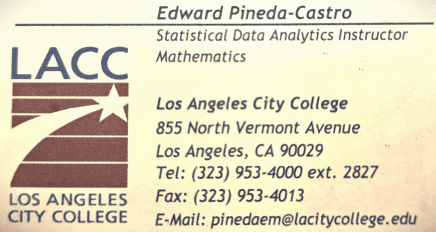

**© 2025 Professor: Edward Pineda-Castro at Los Angeles City College, All rights reserved.**